In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Data//combined.csv")
df=df.iloc[:,3:]
df

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,9.1,15.3,4,1015.6,90,0.5,0,-,284.795833
1,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,239.695455
2,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.635714
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2183,11.1,20.6,3.6,1015.7,76,1.3,3,9.4,223.250000
2184,11.6,21.4,3.4,1017.1,76,1.1,2.4,5.4,248.958333
2185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441.416667
2186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.791667


In [3]:
df.dropna(inplace=True)
df.reset_index()
#df=df.iloc[:,1:]

,index,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,0,9.1,15.3,4,1015.6,90,0.5,0,-,284.795833
1,1,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,239.695455
2,2,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
3,6,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,264.064286
4,7,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
...,...,...,...,...,...,...,...,...,...,...
1086,2177,12.3,22.4,4,1017.9,74,1.3,1.1,3.5,188.041667
1087,2178,11.3,22.3,4.7,1017.7,82,1.1,3,3.5,310.250000
1088,2182,12.3,19.4,6.2,1016.8,80,1.3,6.7,25.9,258.157895
1089,2183,11.1,20.6,3.6,1015.7,76,1.3,3,9.4,223.250000


In [4]:
df=df.replace("-",0)
df.reset_index(drop=True, inplace=True)
df

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,9.1,15.3,4,1015.6,90,0.5,0,0,284.795833
1,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,239.695455
2,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
3,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,264.064286
4,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
...,...,...,...,...,...,...,...,...,...
1086,12.3,22.4,4,1017.9,74,1.3,1.1,3.5,188.041667
1087,11.3,22.3,4.7,1017.7,82,1.1,3,3.5,310.250000
1088,12.3,19.4,6.2,1016.8,80,1.3,6.7,25.9,258.157895
1089,11.1,20.6,3.6,1015.7,76,1.3,3,9.4,223.250000


In [5]:
num=[fet for fet in df.columns if df[fet].dtype!= "O"]
df=df.astype(float)

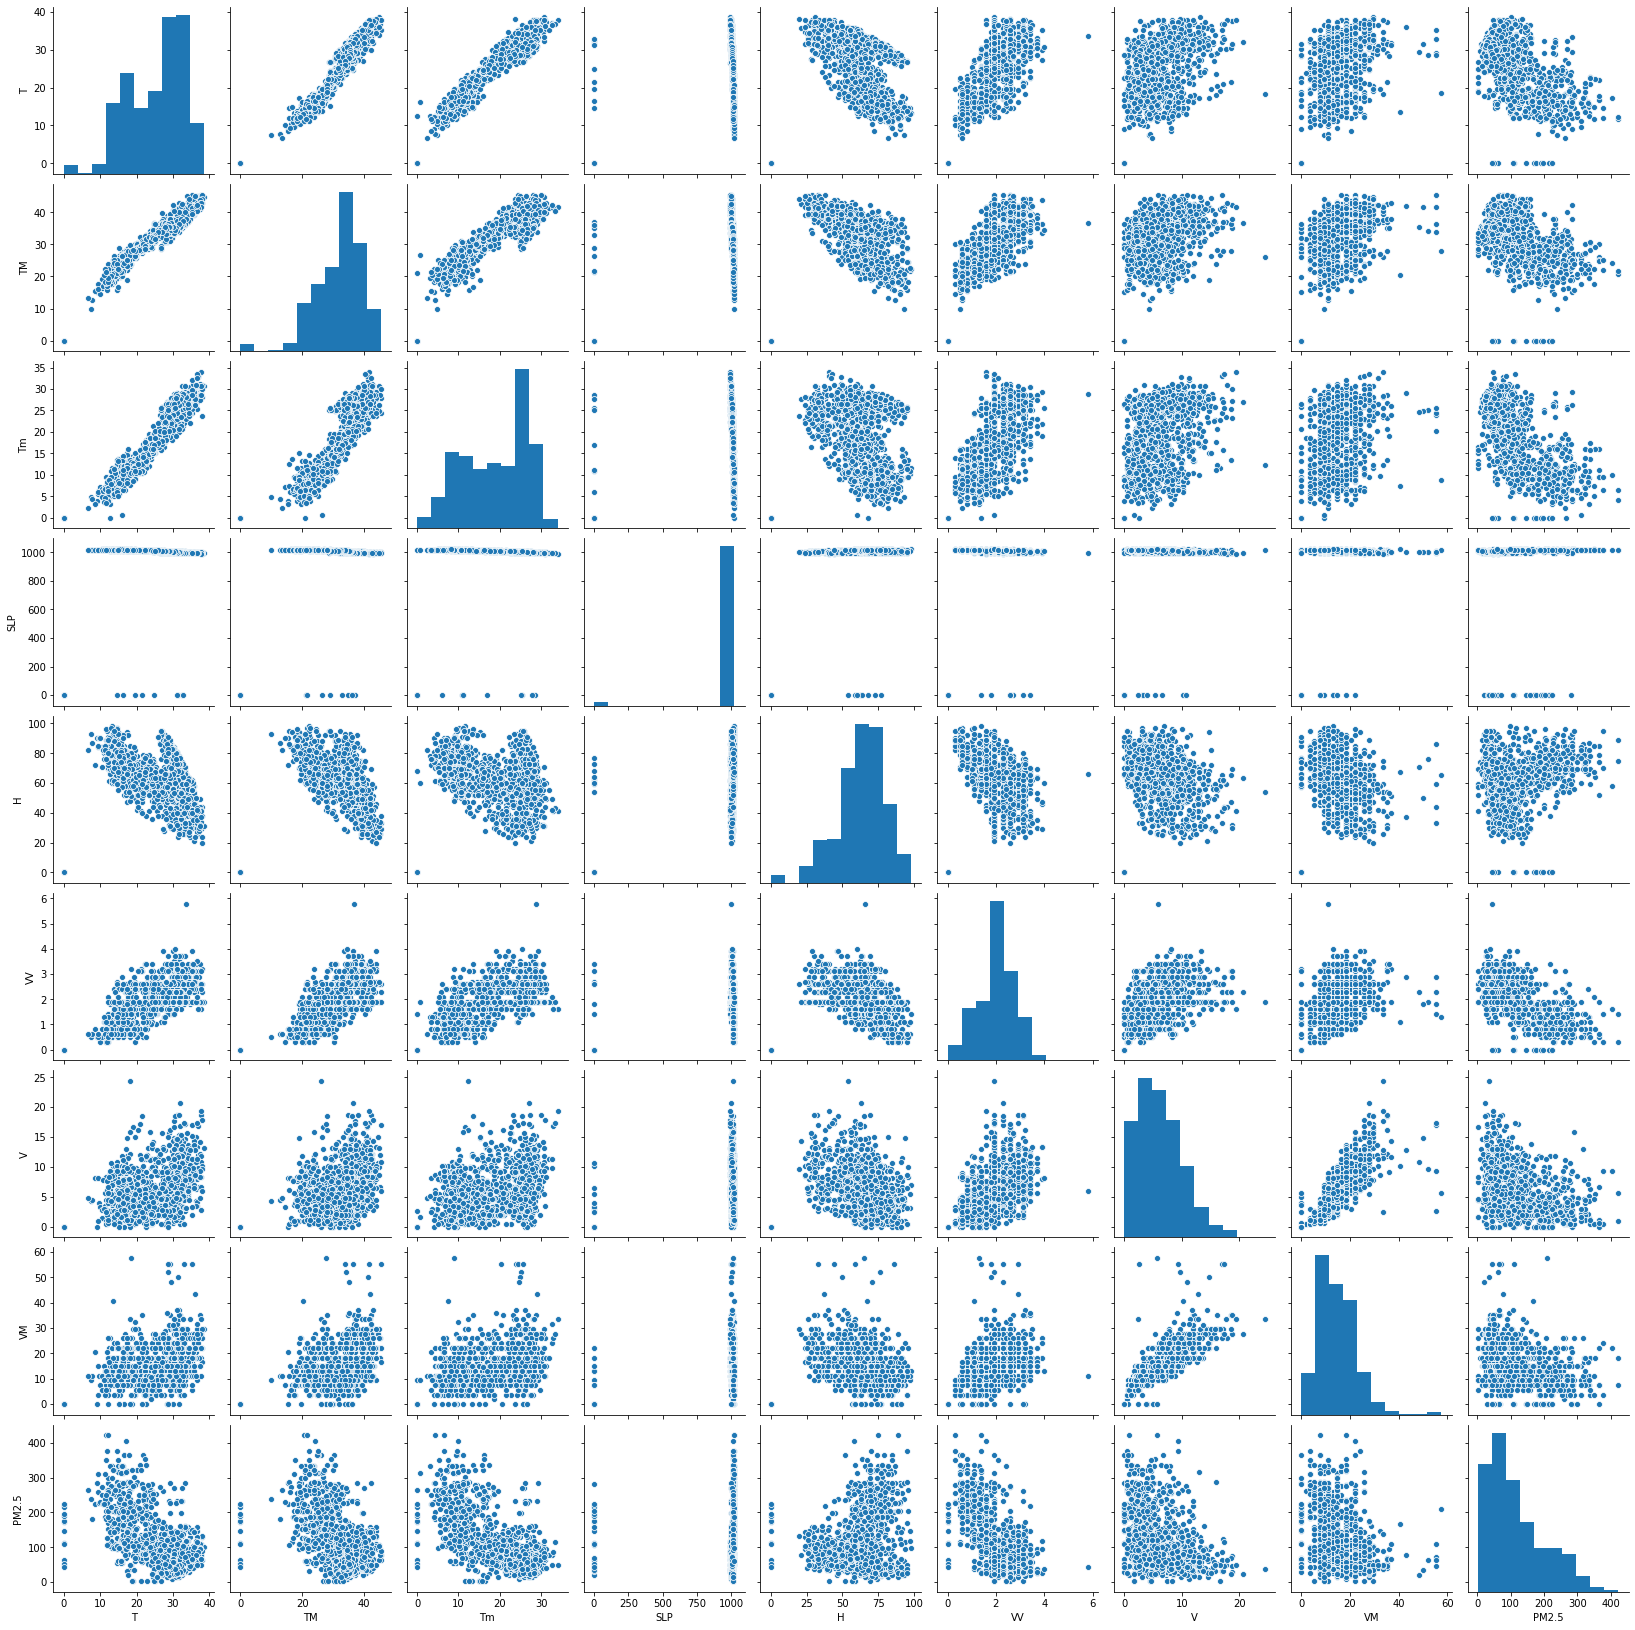

In [6]:
sns.pairplot(df)

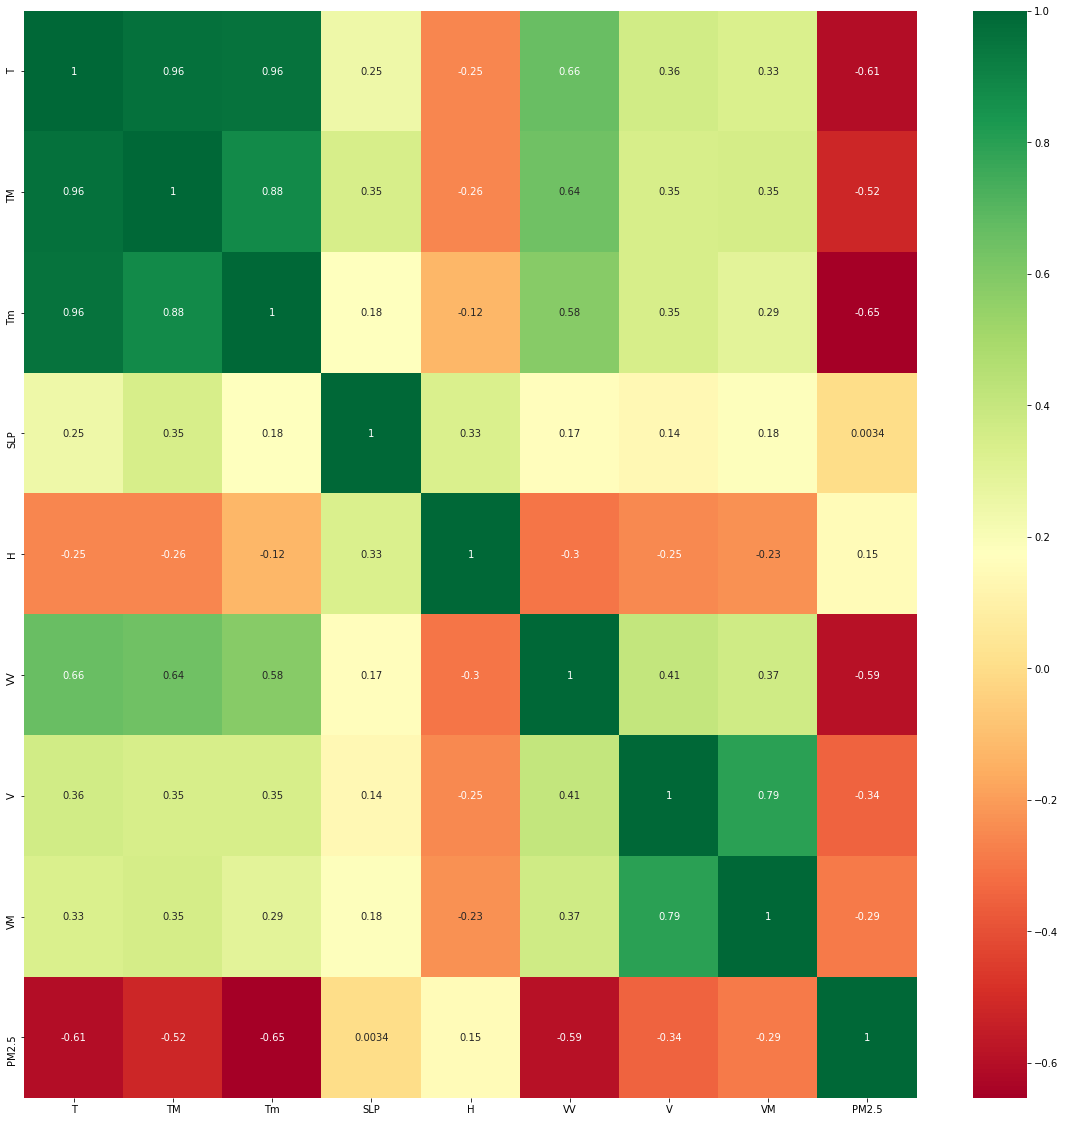

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
model.fit(x,y)

ExtraTreesRegressor()

In [9]:
for i in zip(model.feature_importances_,x.columns):
    print(i)

(0.21470297349421322, 'T')
(0.10602298810009834, 'TM')
(0.23304131761505453, 'Tm')
(0.05670128847810701, 'SLP')
(0.07616596468396274, 'H')
(0.21084391752719442, 'VV')
(0.05813446032293942, 'V')
(0.044387089778430366, 'VM')


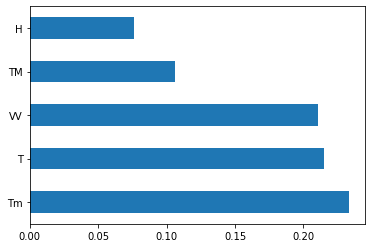

In [10]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
print(cross_val_score(model,x,y).mean())
x_train,x_test,y_train,y_test=train_test_split(x,y)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))
print(model.score(x_test,y_test))

0.5109590471700223
0.4944021988502977
0.4944021988502977


# Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 42.587229841067796
MSE: 3309.299211695059
RMSE: 57.526508773738904


# Ridge regression

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
model=GridSearchCV(ridge,parameters,cv=5)
model.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]})

In [15]:
print(model.best_params_)
print(model.best_score_)

{'alpha': 20}
0.5114961532371588


In [16]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\abhiv\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1458788.425378349, tolerance: 630.8519797826904
  positive)
C:\Users\abhiv\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1403674.4178836276, tolerance: 626.3143702578662
  positive)
C:\Users\abhiv\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1389310.890989584, tolerance: 614.6351016839716
  positive)
C:\Users\abhiv\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

{'alpha': 0.01}
0.510973038079925
